# Guided Project: Finding the Best Markets to Advertise In

this project is to find out the two best markets to advertise our product in.

In [1]:
import pandas as pd
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=0)
survey.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Survey of coders, an anonymous survey of thousands of people who started coding less than 5 years ago.

In [2]:
survey.iloc[0]

Age                                                   27
AttendedBootcamp                                       0
BootcampFinish                                       NaN
BootcampLoanYesNo                                    NaN
BootcampName                                         NaN
BootcampRecommend                                    NaN
ChildrenNumber                                       NaN
CityPopulation                       more than 1 million
CodeEventConferences                                 NaN
CodeEventDjangoGirls                                 NaN
CodeEventFCC                                         NaN
CodeEventGameJam                                     NaN
CodeEventGirlDev                                     NaN
CodeEventHackathons                                  NaN
CodeEventMeetup                                      NaN
CodeEventNodeSchool                                  NaN
CodeEventNone                                        NaN
CodeEventOther                 

In [3]:
survey['JobRoleInterest'].unique()

array([nan, 'Full-Stack Web Developer',
       '  Front-End Web Developer, Back-End Web Developer,   DevOps / SysAdmin,   Mobile Developer, Full-Stack Web Developer',
       ...,
       '  Data Scientist, Game Developer,   Quality Assurance Engineer',
       'Back-End Web Developer, Data Engineer,   Data Scientist,   DevOps / SysAdmin',
       '  DevOps / SysAdmin,   Mobile Developer,   Product Manager, Game Developer,   Front-End Web Developer, Data Engineer,   Quality Assurance Engineer,   User Experience Designer, Back-End Web Developer,   Data Scientist, Full-Stack Web Developer, Information Security, IT specialist '],
      dtype=object)

The JobRoleInterest column that describes for every participant the role(s) they'd be interested in working in. 

In [4]:
survey['JobRoleInterest'].value_counts(normalize = True)

Full-Stack Web Developer                                                                                                                                                                                  0.117706
  Front-End Web Developer                                                                                                                                                                                 0.064359
  Data Scientist                                                                                                                                                                                          0.021739
Back-End Web Developer                                                                                                                                                                                    0.020309
  Mobile Developer                                                                                                                                          

Roles are repeated many times and they are in different order 

In [5]:

jobrole=survey['JobRoleInterest'].str.contains('Web Developer|Mobile Developer').value_counts(normalize = True)

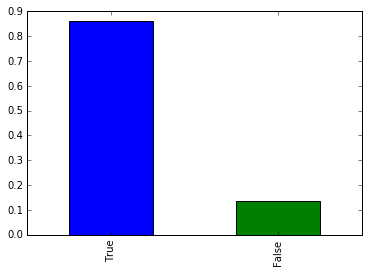

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


jobrole.plot.bar()

Nearly all are interested in web developer or mobile developer roles

In [7]:
#clean it from nulls
survey = survey[survey['JobRoleInterest'].notnull()].copy()

In [8]:
survey['CountryLive'].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand                        33
Argentina   

In [9]:
survey['CountryLive'].value_counts(normalize = True)

United States of America         0.457005
India                            0.077216
United Kingdom                   0.046066
Canada                           0.038023
Poland                           0.019158
Brazil                           0.018865
Germany                          0.018280
Australia                        0.016379
Russia                           0.014917
Ukraine                          0.013016
Nigeria                          0.012284
Spain                            0.011261
France                           0.010968
Romania                          0.010383
Netherlands (Holland, Europe)    0.009506
Italy                            0.009067
Serbia                           0.007605
Philippines                      0.007605
Greece                           0.006727
Ireland                          0.006288
South Africa                     0.005703
Mexico                           0.005411
Turkey                           0.005265
Hungary                          0

US and India have the most learners but we do not have enough other info

In [10]:
survey[survey['CountryLive']=='United States of America']['MoneyForLearning'].mean()/12


103.83053523936171

In [11]:
survey[survey['CountryLive']=='India']['MoneyForLearning'].mean()/12


64.91062544420753

In [12]:
survey[survey['CountryLive']=='United Kingdom']['MoneyForLearning'].mean()/12

26.633158508158505

In [13]:
survey[survey['CountryLive']=='Canada']['MoneyForLearning'].mean()/12

69.85928961748634

In [14]:
#clean it from nulls
survey = survey[survey['MoneyForLearning'].notnull() &
                survey['MonthsProgramming'].notnull() &
                survey['CountryLive'].notnull()].copy()

In [15]:
survey=survey[survey['MonthsProgramming']!=0]
survey['MonthlySpending']=survey['MoneyForLearning']/survey['MonthsProgramming']

In [16]:
survey['CountryLive'].value_counts().head()

United States of America    2810
India                        454
United Kingdom               270
Canada                       235
Poland                       118
Name: CountryLive, dtype: int64

In [17]:
survey4=survey[(survey['CountryLive']=='United States of America') | 
       (survey['CountryLive']=='India') | 
       (survey['CountryLive']=='Canada') | 
       (survey['CountryLive']=='United Kingdom')
      ]

In [18]:
survey4['MonthlySpending'].count()

3769

In [19]:
survey4.groupby('CountryLive')['MonthlySpending'].mean()

CountryLive
Canada                      107.415450
India                       136.347477
United Kingdom               46.904110
United States of America    232.771574
Name: MonthlySpending, dtype: float64

In [20]:
survey4['MonthlySpending']

1          13.333333
2         200.000000
6           0.000000
15          0.000000
16         16.666667
18         35.714286
19         17.857143
21        100.000000
22        285.714286
23        100.000000
28          2.416667
30         66.666667
31          0.000000
32        100.000000
33         83.333333
35          0.000000
40         25.000000
42         50.000000
52          0.000000
55          0.000000
58          0.000000
63         16.666667
64         50.000000
66          2.777778
67          1.785714
68        357.142857
70         50.000000
84         16.666667
89          1.052632
97        166.666667
            ...     
17974      66.666667
17979       0.000000
17980       0.000000
17981       0.000000
17987       0.000000
17991       0.000000
17995       0.000000
17996       0.000000
18000      10.416667
18003      25.000000
18006      14.285714
18007       0.000000
18014       0.000000
18015       5.555556
18017       0.000000
18020       0.000000
18037      83

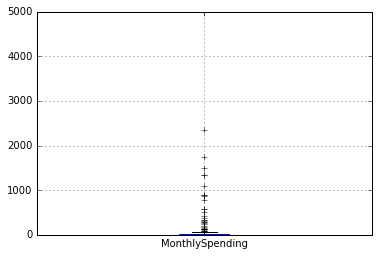

In [21]:
survey4[survey4['CountryLive']=='Canada'].boxplot(column=['MonthlySpending'])

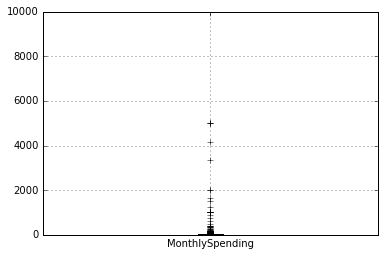

In [22]:
survey4[survey4['CountryLive']=='India'].boxplot(column=['MonthlySpending'])

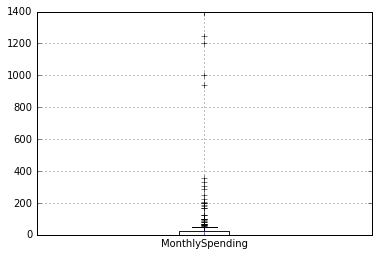

In [23]:
survey4[survey4['CountryLive']=='United Kingdom'].boxplot(column=['MonthlySpending'])

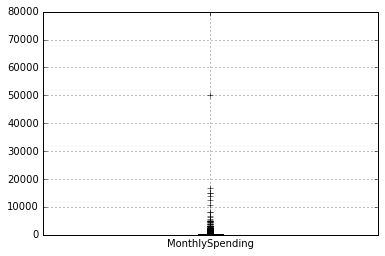

In [24]:
survey4[survey4['CountryLive']=='United States of America'].boxplot(column=['MonthlySpending'])

In [25]:
survey['MonthlySpending'].value_counts().tail()

11.538462      1
8666.666667    1
4.736842       1
4800.000000    1
611.111111     1
Name: MonthlySpending, dtype: int64

In [26]:
survey4[survey4['MonthlySpending']>2000]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpending
415,26.0,1.0,1.0,1.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2333.333333
441,30.0,1.0,0.0,0.0,Rutgers Coding Bootcamp,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,The Net Ninja,NaN,NaN,2250.000000
484,25.0,1.0,1.0,0.0,Codesmith,1.0,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2857.142857
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
723,22.0,1.0,1.0,0.0,Dev Bootcamp,0.0,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
1334,27.0,1.0,1.0,1.0,Codesmith,1.0,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2428.571429
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
2432,37.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3250.000000


obbioisly these were ouliners and need to be removed. Only with boot camp you can spend money

In [ ]:
no_bootcamp=survey4[(survey4['MonthlySpending']>2000) 
                & (survey4['AttendedBootcamp']==0)]


In [33]:
survey4.groupby('CountryLive')['MonthlySpending'].mean()

CountryLive
Canada                      107.415450
India                        65.628917
United Kingdom               46.904110
United States of America    162.603269
Name: MonthlySpending, dtype: float64

In [32]:
survey4=survey4.drop(no_bootcamp.index)